In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()

In [2]:
raw_data = pd.read_csv("C:\\Users\\Vivek K N\\Project CSV files\\Music (365 Data science)\\music_dataset_mod.csv")
raw_data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


<Axes: xlabel='Genre', ylabel='count'>

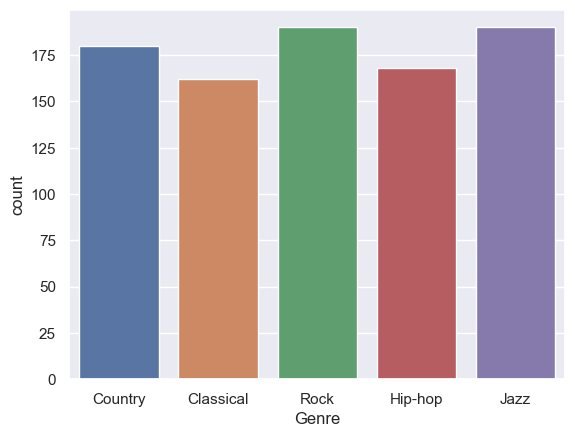

In [3]:
sns.countplot(x= 'Genre', data=raw_data)

In [4]:
data = raw_data.copy()
data.describe(include='all')

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,890
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441,NaN
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840,NaN
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396,NaN
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648,NaN
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840,NaN
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700,NaN


In [5]:
data.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [6]:
data = data.dropna(axis=0)
data.describe(include='all')

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190
mean,120.968758,46.622936,51.710765,55.031680,58.211323,49.184925,54.879728,76.685443,47.413657,47.144869,51.247410,49.069627,NaN
std,19.686122,17.964083,28.977883,29.267789,29.967194,33.206693,29.760746,18.678891,32.405720,32.188425,29.432091,29.335721,NaN
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396,NaN
25%,107.894390,33.964277,26.633202,30.498273,31.565870,22.670425,29.768317,63.359784,11.665296,14.278911,25.941692,23.160076,NaN
50%,121.042383,46.352302,52.550217,54.956635,59.273078,50.463488,56.086125,75.276219,52.785117,50.532543,53.107155,48.820221,NaN
75%,134.937458,58.748546,76.885738,79.354533,83.897759,75.585254,78.796924,89.971576,75.583646,75.495647,77.796041,75.623216,NaN


In [7]:
targets = data['Genre']
variables = data.drop(['Genre'], axis=1)

In [8]:
label_encoder = LabelEncoder()

In [9]:
encoded_labels = label_encoder.fit_transform(data['Genre'])

In [10]:
data1 = data.copy()
data1 = data1.drop(['Genre'], axis=1)
data1['Genre'] = encoded_labels

In [11]:
data1

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


In [12]:
data1.corr()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359,0.232907
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664,0.095718
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554,0.169501
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392,0.607291
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390,0.582498


<Axes: >

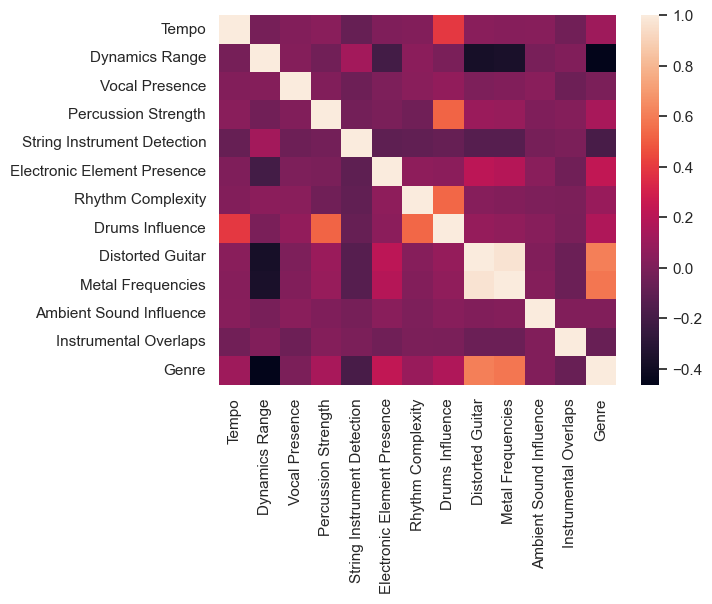

In [13]:
sns.heatmap(data1.corr())

In [14]:
scale = StandardScaler()

In [15]:
data2 = data1.copy()
scale.fit(variables)

StandardScaler()

In [16]:
variables_scaled = scale.fit_transform(variables)

In [17]:
pca = PCA()
pca.fit(variables_scaled)
pca_components = pca.components_
pca_components

array([[-0.12032988,  0.35794905, -0.03047656, -0.17306246,  0.19268171,
        -0.24632358, -0.11541313, -0.22811758, -0.57661365, -0.57036688,
        -0.04027441,  0.06269524],
       [ 0.33022469,  0.19007742,  0.09960973,  0.36976474, -0.05507689,
        -0.06749773,  0.43006203,  0.65666969, -0.19818227, -0.20759777,
         0.04143878,  0.0180585 ],
       [-0.01864694, -0.01739331, -0.37702884,  0.56161865,  0.36815002,
        -0.33598574, -0.39379024,  0.07773967,  0.10271582,  0.10049666,
        -0.20125488,  0.26663607],
       [ 0.31326045,  0.06043101,  0.48097286,  0.16998697,  0.13962727,
        -0.1792994 , -0.46026486, -0.03852108,  0.01638216,  0.03159724,
         0.30170837, -0.52982937],
       [-0.11637092,  0.13552383,  0.02878361, -0.09023248,  0.22930812,
        -0.13742953,  0.22829674,  0.04274849,  0.10130479,  0.09670862,
        -0.71575855, -0.54934439],
       [-0.607718  ,  0.14996258,  0.61846185,  0.19734415,  0.05252711,
        -0.2223614 ,  

In [18]:
transformed_variables = pca.transform(variables_scaled)

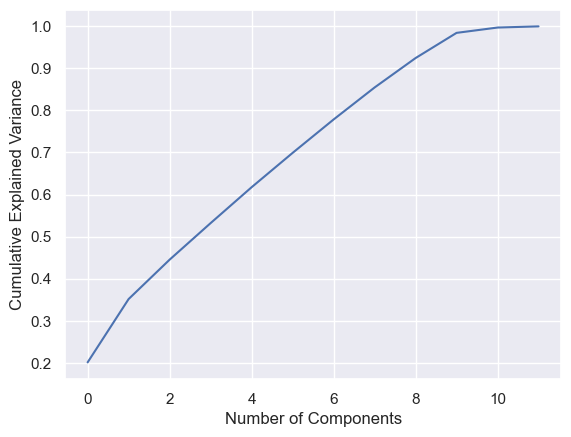

In [19]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [20]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
desired_variance_ratio = 0.8
num_components = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

In [21]:
print(f"Number of components to capture {desired_variance_ratio*100}% of the variance: {num_components}")

Number of components to capture 80.0% of the variance: 8


In [22]:
pca = PCA(n_components=8)
pca.fit(variables_scaled)
transformed_variables1 = pca.transform(variables_scaled)
pca_components1 = pca.components_
component_names = [f"PC{i+1}" for i in range(pca_components1.shape[0])]

In [23]:
loadings_df = pd.DataFrame(pca_components1, columns=variables.columns, index=component_names)

In [24]:
loadings_df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
PC1,-0.120330,0.357949,-0.030477,-0.173062,0.192682,-0.246324,-0.115413,-0.228118,-0.576614,-0.570367,-0.040274,0.062695
PC2,0.330225,0.190077,0.099610,0.369765,-0.055077,-0.067498,0.430062,0.656670,-0.198182,-0.207598,0.041439,0.018059
PC3,-0.018647,-0.017393,-0.377029,0.561619,0.368150,-0.335986,-0.393790,0.077740,0.102716,0.100497,-0.201255,0.266636
PC4,0.313260,0.060431,0.480973,0.169987,0.139627,-0.179299,-0.460265,-0.038521,0.016382,0.031597,0.301708,-0.529829
PC5,-0.116371,0.135524,0.028784,-0.090232,0.229308,-0.137430,0.228297,0.042748,0.101305,0.096709,-0.715759,-0.549344
PC6,-0.607718,0.149963,0.618462,0.197344,0.052527,-0.222361,0.164846,-0.007137,0.112833,0.124480,0.060933,0.274558
PC7,0.201861,-0.114905,0.275396,0.095966,-0.653196,-0.124908,-0.288203,-0.070765,-0.089083,-0.088926,-0.521171,0.207838
PC8,-0.412371,-0.185830,-0.020427,0.456035,-0.067765,0.606789,-0.155769,0.035701,-0.220894,-0.238167,-0.058973,-0.282335


In [25]:
x_pca_train, x_pca_test = train_test_split(transformed_variables1, test_size=0.3, random_state=42)

In [26]:
y_encoded_train, y_encoded_test = train_test_split(data1['Genre'], test_size=0.3, random_state=42)

In [27]:
Logistic_Regression = LogisticRegression(max_iter=10000)

In [28]:
Logistic_Regression.fit(x_pca_train, y_encoded_train)

LogisticRegression(max_iter=10000)

In [29]:
Logistic_Regression.predict(x_pca_test)

array([4, 3, 0, 0, 0, 3, 3, 4, 1, 3, 4, 2, 2, 4, 0, 0, 0, 0, 1, 1, 0, 4,
       0, 0, 3, 3, 2, 0, 1, 1, 1, 3, 1, 4, 1, 4, 4, 4, 2, 3, 3, 3, 2, 4,
       0, 0, 4, 4, 0, 2, 0, 4, 0, 4, 1, 1, 3, 3, 3, 3, 2, 0, 1, 2, 3, 4,
       0, 4, 4, 4, 2, 4, 4, 1, 2, 3, 3, 1, 0, 4, 2, 4, 0, 1, 0, 2, 4, 3,
       3, 0, 2, 4, 3, 1, 0, 1, 4, 4, 4, 1, 1, 3, 2, 1, 4, 2, 2, 4, 4, 2,
       1, 0, 2, 3, 4, 3, 2, 3, 3, 3, 3, 0, 3, 0, 4, 4, 2, 0, 1, 2, 3, 3,
       1, 1, 0, 3, 0, 4, 0, 4, 2, 0, 0, 0, 2, 0, 0, 2, 3, 0, 3, 4, 3, 2,
       1, 4, 3, 2, 1, 1, 4, 3, 2, 1, 4, 2, 2, 0, 1, 4, 3, 0, 3, 4, 0, 3,
       0, 0, 0, 1, 3, 4, 1, 3, 3, 2, 2, 4, 3, 3, 4, 0, 4, 4, 4, 3, 0, 2,
       3, 4, 4, 2, 0, 4, 2, 0, 0, 0, 1, 3, 3, 3, 3, 2, 3, 3, 4, 1, 4, 0,
       4, 0, 3, 2, 0, 3, 2, 4, 4, 2, 3, 4, 4, 3, 0, 1, 3, 4, 4, 1, 4, 0,
       3, 1, 2, 4, 1, 3, 2, 3, 4, 3, 4, 0, 4, 3, 0, 1, 4, 4, 4, 2, 1, 0,
       2, 2, 3])

In [30]:
accuracy = accuracy_score(y_encoded_train, Logistic_Regression.predict(x_pca_train))

In [31]:
print(f'Accuracy is {accuracy*100}%')

Accuracy is 57.46388443017657%


In [32]:
print(classification_report(y_encoded_train, Logistic_Regression.predict(x_pca_train)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       111
           1       0.46      0.36      0.40       128
           2       0.51      0.44      0.47       120
           3       0.50      0.52      0.51       128
           4       0.53      0.64      0.58       136

    accuracy                           0.57       623
   macro avg       0.57      0.58      0.57       623
weighted avg       0.56      0.57      0.57       623



In [33]:
data3 = raw_data.copy()
data3.describe(include='all')

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,890
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441,NaN
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840,NaN
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396,NaN
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648,NaN
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840,NaN
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700,NaN


In [34]:
target_column = 'Genre'
target_with_missing_values = data3[target_column]

In [35]:
features = data3.drop(columns=[target_column])

In [36]:
features_scaled = scale.fit_transform(features)

In [37]:
targeted_features = pca.fit_transform(features_scaled)

In [38]:
predicted_target_values = Logistic_Regression.predict(targeted_features)

In [39]:
data3.loc[:, target_column] = predicted_target_values

C:\Users\Vivek K N\AppData\Local\Temp\ipykernel_2160\2200387379.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data3.loc[:, target_column] = predicted_target_values


In [40]:
data3.describe(include='all')

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441,2.154000
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840,1.481377
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396,0.000000
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648,1.000000
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840,2.000000
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700,4.000000
max,175.982637,104.932942,109.643123,114.949678,119.991892,119.728293,119.699889,140.031079,99.586429,100.000000,99.820903,99.958673,4.000000


In [41]:
decoded_labels = label_encoder.inverse_transform(data3['Genre'])

In [42]:
data3 = data3.drop(['Genre'], axis=1)
data3['Genre'] = decoded_labels

In [43]:
data3

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Country


In [44]:
data3.describe(include='all')

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441,NaN
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840,NaN
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396,NaN
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648,NaN
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840,NaN
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700,NaN


In [45]:
x = data['Genre']
x

0        Country
1      Classical
2           Rock
3        Hip-hop
4        Country
         ...    
973      Hip-hop
996    Classical
997         Rock
998         Rock
999         Jazz
Name: Genre, Length: 890, dtype: object

Series([], Name: Genre, dtype: object)

In [52]:
value_at_index = data3.at[993, 'Genre']

In [53]:
value_at_index

'Hip-hop'

In [55]:
data3.tail(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
990,145.665597,28.642070,52.657254,7.204516,94.165273,7.130571,78.159682,73.616978,94.777354,93.121865,46.236654,77.689609,Rock
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Country
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Country
999,71.050781,32.967250,62.875776,78.868747,88.094454,59.148014,83.420324,59.582109,37.329193,44.576693,87.458414,78.270683,Jazz


In [56]:
accuracy_score(y_encoded_test, Logistic_Regression.predict(x_pca_test))

0.5355805243445693